In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('ClothingReviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.isna().any()


Unnamed: 0         False
Clothing ID        False
Age                False
Title               True
Review Text         True
Rating             False
Recommended IND    False
Positive Count     False
Division Name       True
Department Name     True
Class Name          True
dtype: bool

In [6]:
df['Rating'].unique()


array([4, 5, 3, 2, 1, 0], dtype=int64)

In [7]:
data = pd.DataFrame(df)
data['Rating'] = data['Rating'].replace(0, np.nan)
data['Rating'] = data['Rating'].fillna(data['Rating'].median(axis=0))

In [8]:
data['Rating'].unique()

array([4., 5., 3., 2., 1.])

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')


In [10]:
data2=data.sample(frac=0.5, replace=True, random_state=1)

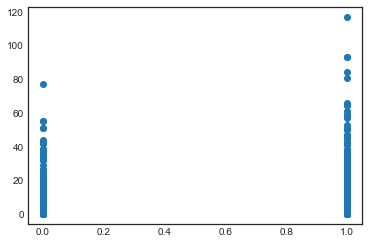

In [11]:
plt.figure()
plt.scatter(data2['Recommended IND'],data2['Positive Count'])
plt.show()

<AxesSubplot:ylabel='Frequency'>

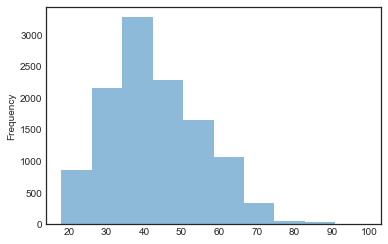

In [12]:
 data2['Age'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

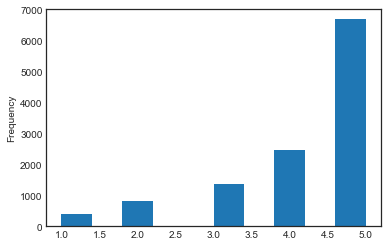

In [13]:
data2['Rating'].plot(kind='hist')


In [14]:

from sklearn.cluster import KMeans    
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn.preprocessing import scale

In [15]:
data3=data.sample(frac=0.04, replace=True, random_state=1)
X = data3[['Positive Count', 'Age']]
X = pd.DataFrame(scale(X), index=X.index, columns=X.columns)
X.head()

,Positive Count,Age
235,-0.294576,-1.185028
12172,-0.488278,0.407236
5192,-0.294576,0.658646
17289,1.255040,-0.933618
10955,-0.488278,-0.011781


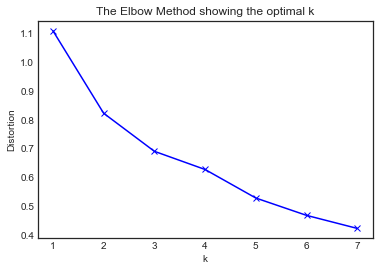

In [21]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
km2 = KMeans(n_clusters=4, n_init=20)
km2.fit(X)

KMeans(n_clusters=4, n_init=20)

In [23]:
km2.cluster_centers_


array([[-0.25014491, -0.72571121],
       [-0.25085424,  0.96536666],
       [ 1.72375136,  0.19721046],
       [ 6.59064973,  0.62055388]])

In [24]:
data= df.dropna()

data['Review Text'] = data['Review Text'].astype(str)


D:\anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
Y=data['Review Text']

In [35]:
 from afinn import Afinn
afinn = Afinn(language='en')
afinn = Afinn(emoticons=True)


In [36]:
for i in range (len(Y)):
    x=afinn.score(Y.iloc[i])
    if(x>0):
        sentiment ='Positive'
    else:
        sentiment ='negative'  
    data['sentiment'].iloc[i]=sentiment

D:\anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [37]:
data['sentiment'].unique()

array(['Positive', 'negative'], dtype=object)

In [38]:
print(data['Review Text'].head(),data['sentiment'].head())

2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses, but this one is no...
6    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object 2    Positive
3    Positive
4    Positive
5    Positive
6    negative
Name: sentiment, dtype: object


In [53]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [61]:
df = pd.DataFrame(data)
X = df[['Age','Recommended IND','sentiment','Department Name']]
Y = df['Rating']
X = pd.get_dummies(data=X, drop_first=True)

In [78]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [79]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          6.430e+04
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:56:30   Log-Likelihood:                         -24592.
No. Observations:               19847   AIC:                                  4.920e+04
Df Residuals:                   19839   BIC:                                  4.926e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [80]:
sumofsquare=sum((predictions-data['Rating'])**2)

In [81]:

print(sumofsquare)

13850.758003725012


In [86]:
X1 = df[['Age','Recommended IND','sentiment']]
X1 = pd.get_dummies(data=X1, drop_first=True)

model2 = sm.OLS(Y, X1).fit()
predictions1 = model2.predict(X1) 

In [88]:
print_model1 = model2.summary()
print(print_model1)

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          1.559e+05
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:58:22   Log-Likelihood:                         -25501.
No. Observations:               19847   AIC:                                  5.101e+04
Df Residuals:                   19844   BIC:                                  5.103e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [89]:
sumofsquare1=sum((predictions1-data['Rating'])**2)

In [90]:
print(sumofsquare1)

15178.596487310335


In [105]:
X = df[['Age','Rating','sentiment','Department Name']]
Y = df['Recommended IND']
X = pd.get_dummies(data=X, drop_first=True)

logit = sm.Logit(Y, X)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.213262
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Recommended IND   No. Observations:                19847
Model:                          Logit   Df Residuals:                    19839
Method:                           MLE   Df Model:                            7
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.5492
Time:                        19:17:12   Log-Likelihood:                -4232.6
converged:                       True   LL-Null:                       -9389.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0653      0.002    -31.163      0.000      -0.069      -0.061
Rating                       1.9525      0.032     61.239      0.000       1.890       2.015
sentiment_negative          -1.1450      0.093    -12.271      0.000      -1.328      -0.962
Department Name_Dresses     -2.8337      0.104    -27.307      0.000      -3.037      -2.630
Department Name_Intimate    -2.6064      0.142    -18.302      0.000      -2.886      -2.327
Department Name_Jackets     -2.4921      0.172    -14.524      0.000      -2.828      -2.156
Department Name_Tops        -2.6746      0.101    -26.609      0.000      -2.872      -2.478
Department Name_Trend       -2.2946      0.377     -6.089      0.000      -3.033      -1.556
============================================================================================
"""

In [108]:
X = df[['Age','Rating','sentiment','Division Name']]
Y = df['Recommended IND']
X = pd.get_dummies(data=X, drop_first=True)

logit = sm.Logit(Y, X)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.238278
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Recommended IND   No. Observations:                19847
Model:                          Logit   Df Residuals:                    19842
Method:                           MLE   Df Model:                            4
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.4964
Time:                        19:22:13   Log-Likelihood:                -4729.1
converged:                       True   LL-Null:                       -9389.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Age                             -0.0867      0.002    -46.147      0.000      -0.090      -0.083
Rating                           1.6324      0.026     62.072      0.000       1.581       1.684
sentiment_negative              -1.3025      0.086    -15.229      0.000      -1.470      -1.135
Division Name_General Petite    -0.5271      0.056     -9.422      0.000      -0.637      -0.417
Division Name_Initmates         -0.4698      0.115     -4.075      0.000      -0.696      -0.244
================================================================================================
"""